[Reference](https://towardsdatascience.com/proximity-analysis-to-find-the-nearest-bar-using-python-a29d29a3754d)

In [1]:
pip install estaty==0.1.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 71.3 MB/s eta 0:00:00
  Created wheel for carto: filename=carto-1.11.3-py3-none-any.whl size=35060 sha256=a4b82d82e5a3eb9dec86c469212209e8afceed052d25c79d099e78f5cd1f69d6
  Stored in directory: /root/.cache/pip/wheels/e6/be/cf/60b6f10a00062e2450007ad9d1681e4e0179a87094283b2da0
  Created wheel for pyrestcli: filename=pyrestcli-0.6.11-py3-none-any.whl size=8473 sha256=4ea7b490df04727740c0d5370a354649cc6cddc91c7e180c306898bd68b54658
  Stored in directory: /root/.cache/pip/wheels/47/ad/ed/ac848188f432e598d5081d8345532f351085257941b5de0e

2023-10-31 11:09:30.279 | DEBUG    | estaty.data_source.load.osm_vector:apply:71 - Successfully load file /usr/local/lib/python3.10/dist-packages/estaty/tmp/Point_52_517_13_386_with_buffer_2000/bar.gpkg from temporary folder
2023-10-31 11:09:30.390 | DEBUG    | estaty.preprocessing.stages.project:apply:35 - Re-projection to 32633 performed successfully


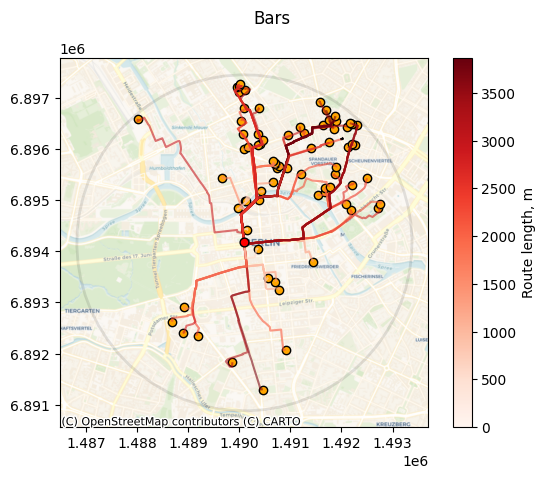

         Length                                           geometry
0   3734.626630  LINESTRING (13.38574 52.51705, 13.38576 52.516...
0   2113.982586  LINESTRING (13.38574 52.51705, 13.38576 52.516...
0   1227.435866  LINESTRING (13.38574 52.51705, 13.38576 52.516...
0   1376.156836  LINESTRING (13.38574 52.51705, 13.38576 52.516...
0    757.517542  LINESTRING (13.38574 52.51705, 13.38576 52.516...
..          ...                                                ...
0   3310.388709  LINESTRING (13.38574 52.51705, 13.38561 52.517...
0   2873.305235  LINESTRING (13.38574 52.51705, 13.38561 52.517...
0   2845.826290  LINESTRING (13.38574 52.51705, 13.38561 52.517...
0   2495.122195  LINESTRING (13.38574 52.51705, 13.38561 52.517...
0   2395.168415  LINESTRING (13.38574 52.51705, 13.38561 52.517...

[76 rows x 2 columns]
Min length: 308.93, m
Mean length: 2306.47, m
Max length: 3869.05, m


In [2]:
from estaty.analysis.action import Analyzer
from estaty.data_source.action import DataSource
from estaty.main import EstateModel
from estaty.preprocessing.action import Preprocessor

import warnings
warnings.filterwarnings('ignore')


def launch_proximity_analysis_for_bars_objects():
    point_for_analysis = {'lat': 52.5171411, 'lon': 13.3857187}
    osm_source = DataSource('osm', params={'category': 'bar'})

    osm_reprojected = Preprocessor('reproject', params={'to': 'auto'}, from_actions=[osm_source])

    analysis = Analyzer('distance', params={'network_type': 'walk', 'visualize': True, 'color': 'orange',
                                            'edgecolor': 'black', 'title': 'Bars'},
                        from_actions=[osm_reprojected])

    model = EstateModel().for_property(point_for_analysis, radius=2000)
    founded_routes = model.compose(analysis)

    print(founded_routes.lines)
    print(f'Min length: {founded_routes.lines["Length"].min():.2f}, m')
    print(f'Mean length: {founded_routes.lines["Length"].mean():.2f}, m')
    print(f'Max length: {founded_routes.lines["Length"].max():.2f}, m')


if __name__ == '__main__':
    launch_proximity_analysis_for_bars_objects()